# Some approximation features from computational math second lab

We'll need'em here as well

Check [it out](https://github.com/johnny-keker/computational-mathematics/tree/master/lab2)

In [1]:
import math

def linear(xs, k, b):
    res = []
    for x in xs:
        res.append(k*x + b)
    return res

def sx(xs):
    res = 0
    for x in xs:
        res += x
    return res

def sxx(xs):
    res = 0
    for x in xs:
        res += x**2
    return res

def sxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i] * ys[i]
    return res

def sxxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i]**2 * ys[i]
    return res

def pow_n(xs, n):
    res = 0
    for x in xs:
        res += x**n
    return res

def epsilon(ys1, ys2):
    res = []
    for i in range(len(ys1)):
        res.append(ys1[i] - ys2[i])
    return res

def standard_deviation(eps):
    return sxx(eps)

def square_deviation(eps):
    return math.sqrt(sxx(eps)/len(eps))

def linear_approximation(xs, ys):
    a = (sxy(xs, ys)*len(xs) - sx(xs)*sx(ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    b = (sxx(xs)*sx(ys) - sx(xs)*sxy(xs, ys))/(sxx(xs)*len(xs) - sx(xs)**2)
    return [a, b]

def square_approximation(xs, ys):
    left = np.array([
                     [len(xs), sx(xs), sxx(xs)],
                     [sx(xs), sxx(xs), pow_n(xs, 3)],
                     [sxx(xs), pow_n(xs, 3), pow_n(xs, 4)]
                    ])
    right = np.array([sx(ys), sxy(xs, ys), sxxy(xs, ys)])
    return np.linalg.solve(left, right)

def polynomial_second_degree(xs, a0, a1, a2):
    res = []
    for x in xs:
        res.append(a0*x**2 + a1*x + a2)
    return res

# Labwork itself

epsilon = 15.4 +- 0.1 В
I_k = 0.0227 +- 0.0001 А
r = 678.4 +- 7.393741060701413
u(i) = -680.765 * i + 15.435


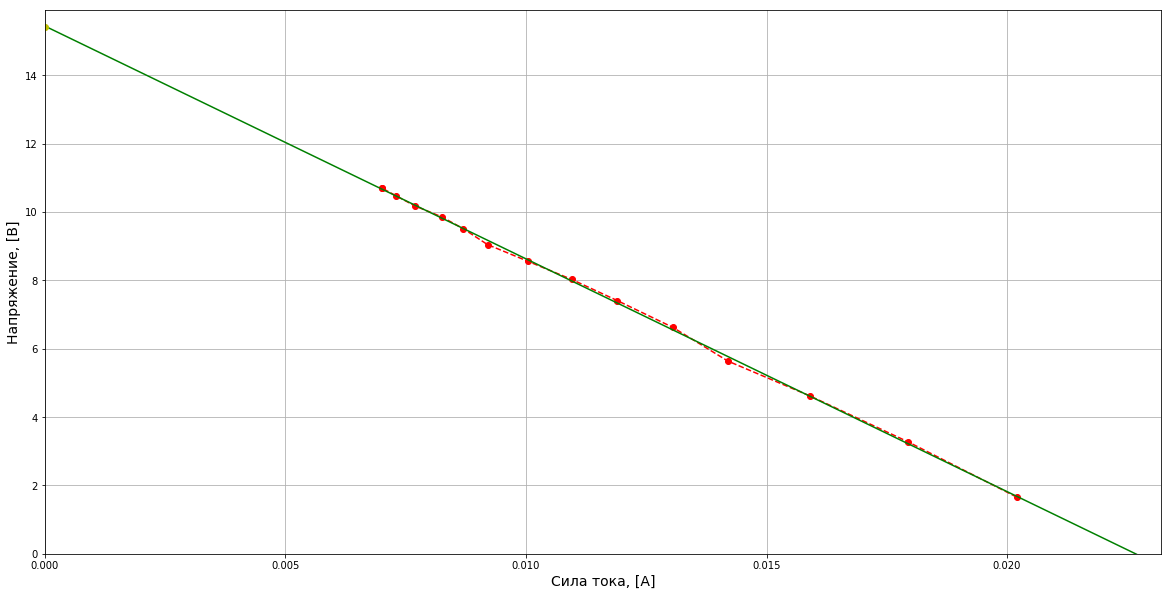

i(u) = -0.001 * i + 0.023
delta i = 0.0001


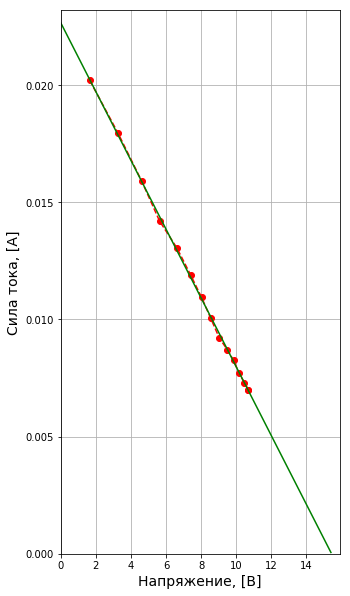

0.0
kpd(i) = -44.053 * i + 1.0
i in 0.5 = 0.0114 +- 0.0001
r in 0.5 kpd = 678.0 +- 10.381930133990853


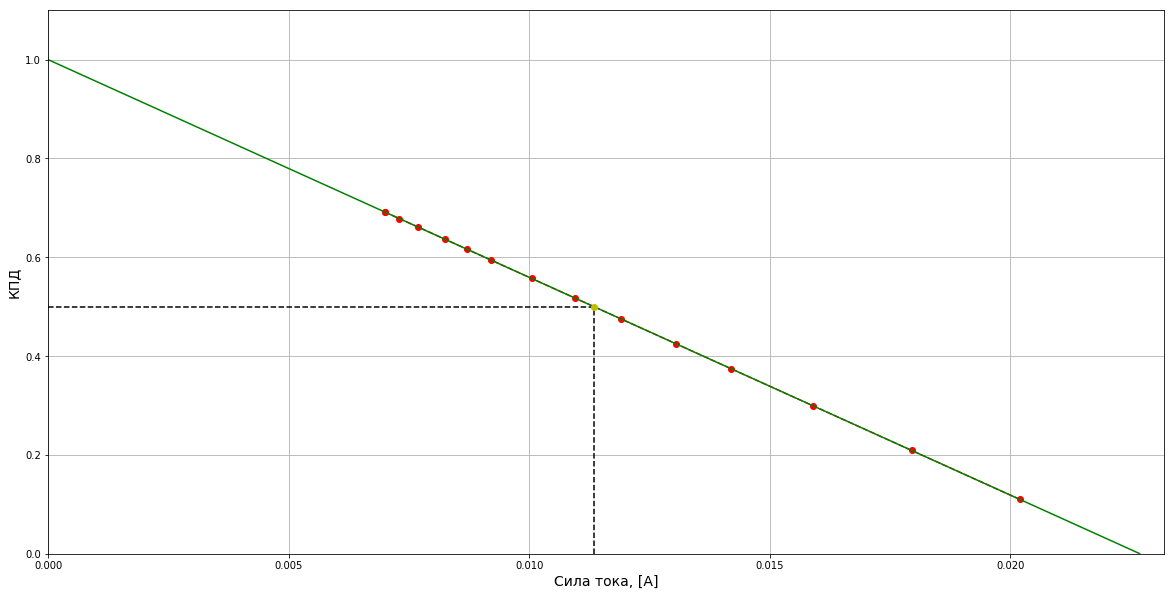

0.0
p1(i) = -678.34 * i^2 + 15.398 * i + 0.0


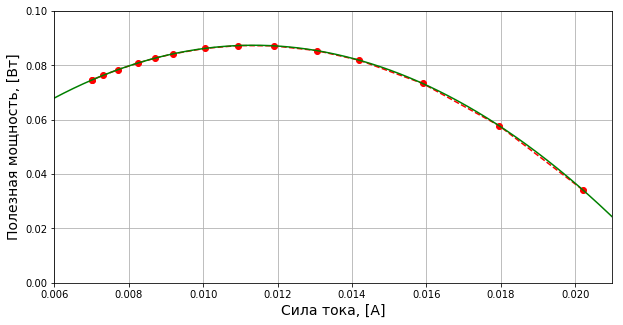

0.0
p2(i) = 678.34 * i^2 + 0.002 * i + -0.0


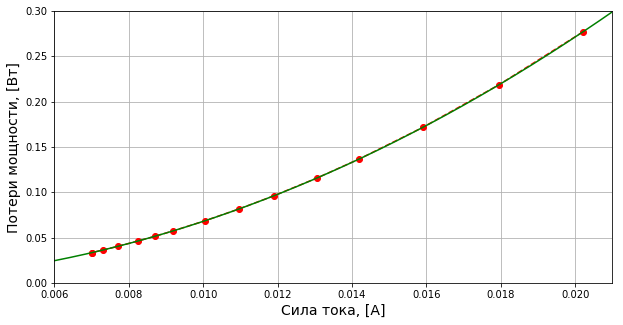

0.0
p(i) = 15.4 * i + 0.0


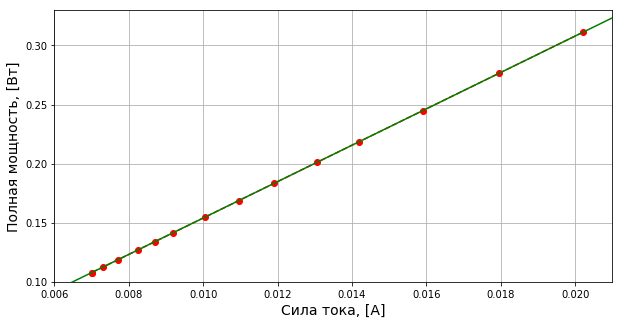

p1_max = 0.087 +- 0.002
i in p1_max = 0.0114 +- 0.0001
r from p1 = 678.4 +- 28.2


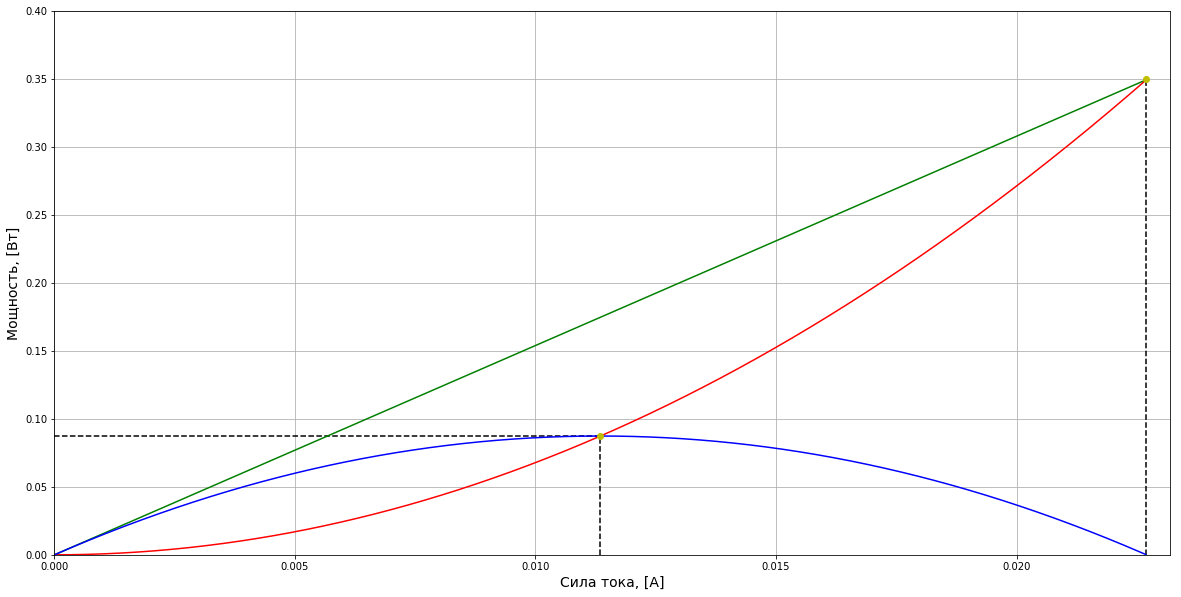

In [54]:
import numpy as np
import matplotlib.pyplot as plt

u1 = np.array([1.7, 3.2, 4.5, 5.6, 6.7, 7.4, 8.0, 8.5, 9.0, 9.5, 9.9, 10.18, 10.46, 10.7, 10.7])
u2 = np.array([1.62, 3.34, 4.74, 5.67, 6.55, 7.41, 8.05, 8.6, 9.09, 9.51, 9.81, 10.16, 10.48, 10.7, 10.7])
u_mean = [round((u1[i] + u2[i]) / 2, 5) for i in range(len(u1))]

i1 = np.array([0.02, 0.018, 0.016, 0.014, 0.013, 0.012, 0.011, 0.01, 0.009, 0.0087, 0.0082, 0.0077, 0.0073, 0.007, 0.007])
i2 = np.array([0.0204, 0.0179, 0.0158, 0.0144, 0.0131, 0.0118, 0.0109, 0.0101, 0.0094, 0.0087, 0.0083, 0.0077, 0.0073, 0.007, 0.007])
i_mean = [round((i1[i] + i2[i]) / 2, 5) for i in range(len(i1))]


linear_u_i = linear_approximation(i_mean, u_mean)
linear_i_u = linear_approximation(u_mean, i_mean)
ys_linear_u_i = linear(i_mean, linear_u_i[0], linear_u_i[1])
ys_linear_i_u = linear(u_mean, linear_i_u[0], linear_i_u[1])
square_delta_u_i = round(square_deviation(epsilon(u_mean, ys_linear_u_i)), 1)
#print(square_delta_u_i)
square_delta_i_u = round(square_deviation(epsilon(ys_linear_i_u, i_mean)), 4)

epsilon_source = round(linear([0], linear_u_i[0], linear_u_i[1])[0], 1)
i_k = round(linear_u_i[1] / -linear_u_i[0], 4) 
inner_resistance = round(epsilon_source / i_k, 1)
delta_r = inner_resistance * ((square_delta_u_i/epsilon_source) + (square_delta_i_u/i_k))

print(f"epsilon = {epsilon_source} +- {square_delta_u_i} В")
print(f"I_k = {i_k} +- {square_delta_i_u} А")
print(f"r = {inner_resistance} +- {delta_r}")


p1 = np.array([round(i * epsilon_source - i**2 * inner_resistance, 5) for i in i_mean])
p2 = np.array([round(i**2 * inner_resistance, 5) for i in i_mean])
p = [round(np.sum([p1[i], p2[i]]), 5) for i in range(len(p1))]
kpd = [round(p1[i] / p[i], 5) for i in range(len(p))]
#print(kpd)
#print(f"{p1}\n\n{p2}\n\n{p}\n\n{kpd}")

plot_x = np.array(np.arange(0, i_k, step = 0.00001))
plot_x_vert = np.array(np.arange(0, epsilon_source, step = 0.00001))

print(f"u(i) = {round(linear_u_i[0], 3)} * i + {round(linear_u_i[1], 3)}")
plt.figure(figsize=(20, 10))
plt.plot(i_mean, u_mean, 'ro--',
         plot_x, linear(plot_x, linear_u_i[0], linear_u_i[1]), 'g',
         0.0, epsilon_source, 'yo')
plt.xlabel('Сила тока, [А]', fontsize=14)
plt.ylabel('Напряжение, [В]', fontsize=14)
#plt.vlines(i_mean, 0, u_mean, linestyle="dashed")
#plt.hlines(u_mean, 0, i_mean, linestyle="dashed")
ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([0, i_k + 0.0005, 0, epsilon_source + 0.5])
plt.grid()
plt.show()

print(f"i(u) = {round(linear_i_u[0], 3)} * i + {round(linear_i_u[1], 3)}")
print(f"delta i = {square_delta_i_u}")
plt.figure(figsize=(5, 10))
plt.plot(u_mean, i_mean, 'ro--',
         plot_x_vert, linear(plot_x_vert, linear_i_u[0], linear_i_u[1]), 'g')
plt.xlabel('Напряжение, [В]', fontsize=14)
plt.ylabel('Сила тока, [А]', fontsize=14)
#plt.vlines(i_mean, 0, u_mean, linestyle="dashed")
#plt.hlines(u_mean, 0, i_mean, linestyle="dashed")
ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([0, epsilon_source + 0.5, 0, i_k + 0.0005])
plt.grid()
plt.show()

linear_kpd_i = linear_approximation(i_mean, kpd)
ys_linear_kpd_i = linear(i_mean, linear_kpd_i[0], linear_kpd_i[1])
square_delta_kpd_i = round(square_deviation(epsilon(kpd, ys_linear_kpd_i)), 1)
print(square_delta_kpd_i)
print(f"kpd(i) = {round(linear_kpd_i[0], 3)} * i + {round(linear_kpd_i[1], 3)}")

plt.figure(figsize=(20, 10))
i_in_half_kpd = (0.5 - linear_kpd_i[1]) / linear_kpd_i[0]
r_in_half_kpd = - (-0.5 * epsilon_source) / i_in_half_kpd
delta_r_half_kpd = r_in_half_kpd * ((square_delta_u_i / epsilon_source) + (square_delta_i_u / i_in_half_kpd))
print(f"i in 0.5 = {round(i_in_half_kpd, 4)} +- {square_delta_i_u}")
print(f"r in 0.5 kpd = {round(r_in_half_kpd)} +- {delta_r_half_kpd}")
plt.vlines(i_in_half_kpd, 0, 0.5, linestyle="dashed")
plt.hlines(0.5, 0, i_in_half_kpd, linestyle="dashed")
plt.plot(i_mean, kpd, 'ro--',
         plot_x, linear(plot_x, linear_kpd_i[0], linear_kpd_i[1]), 'g',
         i_in_half_kpd, 0.5, 'yo')
plt.xlabel('Сила тока, [А]', fontsize=14)
plt.ylabel('КПД', fontsize=14)
ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([0, i_k + 0.0005, 0, 1.1])
plt.grid()
plt.show()


square_p1_i = square_approximation(i_mean, p1)
ys_square_p1_i = polynomial_second_degree(i_mean, square_p1_i[2], square_p1_i[1], square_p1_i[0])
square_delta_p1_i = round(square_deviation(epsilon(p1, ys_square_p1_i)), 3)
print(square_delta_p1_i)
print(f"p1(i) = {round(square_p1_i[2], 3)} * i^2 + {round(square_p1_i[1], 3)} * i + {round(square_p1_i[0], 3)}")

plt.figure(figsize=(10, 5))
plt.plot(i_mean, p1, 'ro--',
         plot_x, polynomial_second_degree(plot_x, square_p1_i[2], square_p1_i[1], square_p1_i[0]), 'g')
plt.xlabel('Сила тока, [А]', fontsize=14)
plt.ylabel('Полезная мощность, [Вт]', fontsize=14)
         #0.0, epsilon_source, 'yo')
#plt.vlines(i_mean, 0, u_mean, linestyle="dashed")
#plt.hlines(u_mean, 0, i_mean, linestyle="dashed")
ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([0.006, 0.021, 0, 0.1])
plt.grid()
plt.show()


square_p2_i = square_approximation(i_mean, p2)
ys_square_p2_i = polynomial_second_degree(i_mean, square_p2_i[2], square_p2_i[1], square_p2_i[0])
square_delta_p2_i = round(square_deviation(epsilon(p2, ys_square_p2_i)), 3)
print(square_delta_p2_i)
print(f"p2(i) = {round(square_p2_i[2], 3)} * i^2 + {round(square_p2_i[1], 3)} * i + {round(square_p2_i[0], 3)}")

plt.figure(figsize=(10, 5))
plt.plot(i_mean, p2, 'ro--',
         plot_x, polynomial_second_degree(plot_x, square_p2_i[2], square_p2_i[1], square_p2_i[0]), 'g')
plt.xlabel('Сила тока, [А]', fontsize=14)
plt.ylabel('Потери мощности, [Вт]', fontsize=14)
         #0.0, epsilon_source, 'yo')
#plt.vlines(i_mean, 0, u_mean, linestyle="dashed")
#plt.hlines(u_mean, 0, i_mean, linestyle="dashed")
ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([0.006, 0.021, 0, 0.3])
plt.grid()
plt.show()


linear_p_i = linear_approximation(i_mean, p)
ys_linear_p_i = linear(i_mean, linear_p_i[0], linear_p_i[1])
square_delta_p_i = round(square_deviation(epsilon(p, ys_linear_p_i)), 1)
print(square_delta_p_i)
print(f"p(i) = {round(linear_p_i[0], 3)} * i + {round(linear_p_i[1], 3)}")

plt.figure(figsize=(10, 5))
plt.plot(i_mean, p, 'ro--',
         plot_x, linear(plot_x, linear_p_i[0], linear_p_i[1]), 'g')
plt.xlabel('Сила тока, [А]', fontsize=14)
plt.ylabel('Полная мощность, [Вт]', fontsize=14)
         #0.0, epsilon_source, 'yo')
#plt.vlines(i_mean, 0, u_mean, linestyle="dashed")
#plt.hlines(u_mean, 0, i_mean, linestyle="dashed")
ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([0.006, 0.021, 0.1, 0.33])
plt.grid()
plt.show()

p1_max_i = (-square_p1_i[1]) / (2 * square_p1_i[2])
p1_max = polynomial_second_degree([p1_max_i], square_p1_i[2], square_p1_i[1], square_p1_i[0])[0]
delta_p1_max = p1_max * ((square_delta_i_u / p1_max_i) + (square_delta_u_i / epsilon_source) + (delta_r / inner_resistance))
r_from_p1 = -(p1_max - (p1_max_i * epsilon_source)) / p1_max_i**2
delta_r_from_p1 = r_from_p1 * ((delta_p1_max / p1_max) + (square_delta_u_i / epsilon_source) + (square_delta_i_u / p1_max_i))
print(f"p1_max = {round(p1_max, 3)} +- {round(delta_p1_max, 3)}\ni in p1_max = {round(p1_max_i, 4)} +- {square_delta_i_u}\nr from p1 = {round(r_from_p1, 1)} +- {round(delta_r_from_p1, 1)}")

plt.figure(figsize=(20, 10))
plt.plot(
         plot_x, linear(plot_x, linear_p_i[0], linear_p_i[1]), 'g',
         plot_x, polynomial_second_degree(plot_x, square_p2_i[2], square_p2_i[1], square_p2_i[0]), 'r',
         plot_x, polynomial_second_degree(plot_x, square_p1_i[2], square_p1_i[1], square_p1_i[0]), 'b',
         p1_max_i, p1_max, 'yo',
         i_k, 0.35, 'yo',
         )
         #0.0, epsilon_source, 'yo')
plt.vlines(i_k, 0, 0.35, linestyle="dashed")
plt.vlines(p1_max_i, 0, p1_max, linestyle="dashed")
plt.hlines(p1_max, 0, p1_max_i, linestyle="dashed")
plt.xlabel('Сила тока, [А]', fontsize=14)
plt.ylabel('Мощность, [Вт]', fontsize=14)
ax = plt.gca()
ax.set_autoscale_on(False)
ax.axis([0, i_k + 0.0005, 0, 0.4])
plt.grid()
plt.show()
